In [4]:
import urllib.request, json
import pandas as pd
import numpy as np
import os
os.getcwd()

'C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\python_code'

In [6]:
os.chdir('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\complain')

In [7]:
Santafe_16 = pd.read_csv('Santafe_review_16.csv')
Santafe_17 = pd.read_csv('Santafe_review_17.csv')

In [8]:
Santafe_merge = pd.concat([Santafe_16, Santafe_17])
Santafe_merge

,Unnamed: 0,B_category,S_category,city,country,date,sub_title,text,title,year
0,0,fuel_system,fuel_propulsion_system,NC,USA,Jun 28,"8,000 miles",I bought a 2016 Santa Fe sport at carmax 8000 ...,Santa Fe,1016
1,1,seat_belts_air_bags,seat_belts-front-retractor,Sound,USA,Sep 03,miles,2016 Hyundai sante fe involved in a near head ...,Santa Fe,2016
2,2,wheels_hubs,wheels,TX,USA,Mar 25,"3,400 miles",The SUV 2016 come equipped with Continental 23...,Santa Fe,2016
3,3,body_paint,structure-body,Haven,USA,Dec 04,"13,640 miles",The entire panarama sunroof exploded on my 201...,Santa Fe,2016
4,4,body_paint,structure,VA,USA,Oct 06,900 miles,The contact owns a 2016 Hyundai Santa Fe. The ...,Santa Fe,2015
5,5,miscellaneous,unknown_or_other,NC,USA,Apr 01,"8,100 miles",The front sunroof on my 2016 Santa Fe I bought...,Santa Fe,2016
6,6,miscellaneous,unknown_or_other,Paso,USA,Dec 09,"4,995 miles",The panoramic sunroof spontaneously shattered ...,Santa Fe,2015
7,7,electrical,no_audible_alarm_when_passenger_seat_belt_unho...,Sabot,USA,Jan 30,Automatic transmission-134 miles,When passenger does not buckle their seat belt...,Santa Fe Sport 2.4L,2016
8,8,drivetrain,power_train,IL,USA,Feb 24,"2,500 miles","While the vehicle was parked, when shifting in...",Santa Fe,2016
9,9,drivetrain,loud_rattle,B.Fort,US,Aug 30,"Automatic transmission-6,000 miles",Loud Rattle at times under car. Sounds like so...,Santa Fe Sport 4,2016


In [ ]:
Santafe_merge = Santafe_merge.drop(['Unnamed: 0'], axis=1)

In [ ]:
Santafe_merge.index = [x for x in range(len(Santafe_merge))]
Santafe_merge

In [ ]:
Not_santafe = Santafe_merge[Santafe_merge['title'] != 'Santa Fe']
Not_santafe

In [ ]:
Not_santafe = Santafe_merge[Santafe_merge['title'] != 'Santa Fe']
Santafe_index = []
for x in Not_santafe.index.tolist():
    if('sport' or '2.0l' or '2.0t' or 'turbo' or 't' or '4cyl' or '4') in Not_santafe['title'][x].lower().split(" "):
        Santafe_index.append(x)

In [ ]:
Not_santafe = Santafe_merge[Santafe_merge['title'] != 'Santa Fe']
Maxcruz_index = []
for x in Not_santafe.index.tolist():
    if not('sport' or '2.0l' or '2.0t' or 'turbo' or 't' or '4cyl' or '4') in Not_santafe['title'][x].lower().split(" "):
        Maxcruz_index.append(x)

## title로 구분안되는 애들 구별하기

In [ ]:
Santafe = Santafe_merge[Santafe_merge['title'] == 'Santa Fe']
print(Santafe.shape)
print(len(Santafe_index))
print(len(Maxcruz_index))

In [ ]:
for x in Santafe.index.tolist():
    if ('sport' or '2.0l' or '2.0t' or 'turbo' or 't' or '4cyl' or '4') in Santafe['text'][x].split(" "):
        Santafe_index.append(x)

In [ ]:
len(Santafe_index)

# 연습용.....

## plot에 한글적용시키기

In [1]:
from matplotlib import font_manager, rc
font_fname = 'c:/windows/fonts/gulim.ttc'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

In [2]:
import nltk
from nltk import regexp_tokenize
from nltk.corpus import gutenberg

In [ ]:
nltk.download()

In [9]:
santafe_review = Santafe_merge['text'].values
santafe_review[0]

'I bought a 2016 Santa Fe sport at carmax 8000 miles and when I filled the tank the first time I could only fill about 13 gal, I drove in town about 280 miles. Filled now a few times and only can fill about 13 gal each time. It shows as full, however the tank is a 17 gal tank. Also when fill the gauge shows I should get about 380 miles but I only get about 280. I have seen on other forums this seems to be a problem with even 2015 vehicles as well.-Charlotte, NC, USA'

## Tokenizing(문장 나누기)

In [49]:
word_test = nltk.word_tokenize(total_review)

In [50]:
en = nltk.Text(word_test)

In [51]:
print(len(en.tokens))

16424


In [73]:
en.collocations()

traction control; become bare; Hyundai Santa; passenger seat; low
speed; contact owns; 2017 Hyundai; failure mileage; cruise control;
brand new; harness assembly; seat belt; 3rd party; safety issue; bare
wire; adjuster caused; power inverter; steering wheel; party power;
2017 Santa


In [115]:
x = dict(en.vocab())

In [116]:
x = sorted(x.items() , key=lambda k : k[1], reverse=True)[:50]
x

[('the', 811),
 ('.', 708),
 (',', 502),
 ('to', 458),
 ('I', 371),
 ('and', 370),
 ('a', 364),
 ('it', 251),
 ('was', 218),
 ('of', 185),
 ('is', 178),
 ('in', 172),
 ('car', 161),
 ('on', 157),
 ('this', 148),
 ('not', 147),
 ('that', 143),
 ('have', 129),
 ('vehicle', 123),
 ('The', 121),
 ('when', 120),
 ('for', 96),
 ('at', 92),
 ('with', 90),
 ('as', 80),
 ('(', 79),
 ('Hyundai', 78),
 (')', 78),
 ('from', 77),
 ('has', 77),
 ('but', 68),
 ('my', 68),
 ('USA', 65),
 ('or', 65),
 ('me', 62),
 ('they', 60),
 ('had', 58),
 ('Fe', 57),
 ('be', 57),
 ('issue', 56),
 ('problem', 55),
 ('Santa', 54),
 ('are', 53),
 ('out', 52),
 ('It', 51),
 ('been', 48),
 ('driving', 48),
 ('would', 48),
 ('there', 47),
 ('will', 46)]

C:\Users\kb910\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Gulim'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


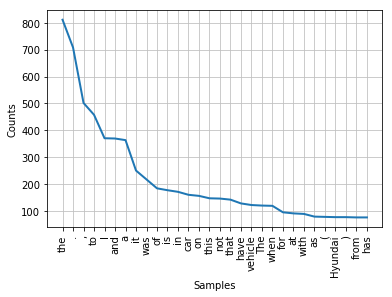

In [52]:
en.plot(30)

In [ ]:
os.getcwd()

## Wordcloud

In [53]:
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [59]:
d = path.dirname('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\complain\\')
alice_mask = np.array(Image.open(path.join(d, "mask.jpg")))

In [43]:
total_review = ""
for sentence in santafe_review:
    total_review = total_review + " " +sentence 

In [44]:
total_review

' I bought a 2016 Santa Fe sport at carmax 8000 miles and when I filled the tank the first time I could only fill about 13 gal, I drove in town about 280 miles. Filled now a few times and only can fill about 13 gal each time. It shows as full, however the tank is a 17 gal tank. Also when fill the gauge shows I should get about 380 miles but I only get about 280. I have seen on other forums this seems to be a problem with even 2015 vehicles as well.-Charlotte, NC, USA 2016 Hyundai sante fe involved in a near head on collision. Combined total speed of impact approximately 80 mph. Two occupants both wearing seatbelts at time of crash. Driver side and passenger side airbags deployed during crash. Passenger shoulder harness failed (locking mechanism did not lock) resulting in passenger head impact with wind shield causing significant deformation of wind shield and head injury to the passenger. Lap belt restraint prevented passenger from significantly worse injury. Photos are available.-Hobe

In [60]:
wordcloud = WordCloud(max_font_size=40,background_color="white", max_words=2000, mask=alice_mask).generate(total_review)

C:\Users\kb910\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Gulim'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


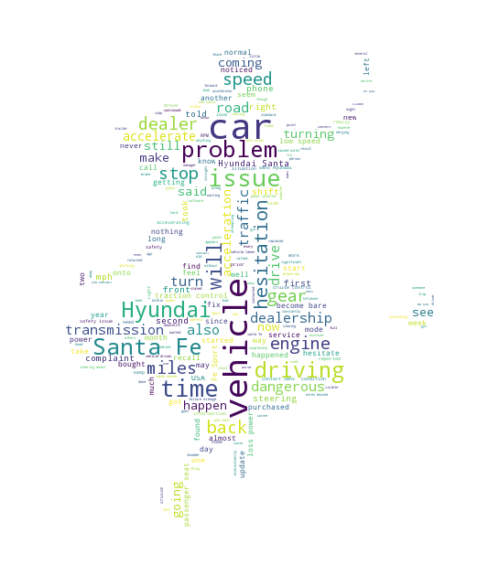

In [63]:
fig, ax = plt.subplots(1, figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('test.jpg')
plt.show()


## 품사태깅

In [129]:
tagged_list = nltk.pos_tag(word_test)

In [132]:
tagged_list[0][1]

'PRP'

## Lesson Learned
* Word Cloud로 빈도수 높은 단어 추출
* Word2Vec와 어떻게 연결짓지
* 형태소 분석을 통해 의미있는 단어 추출